<ipython-input-25-baf31269306b>:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


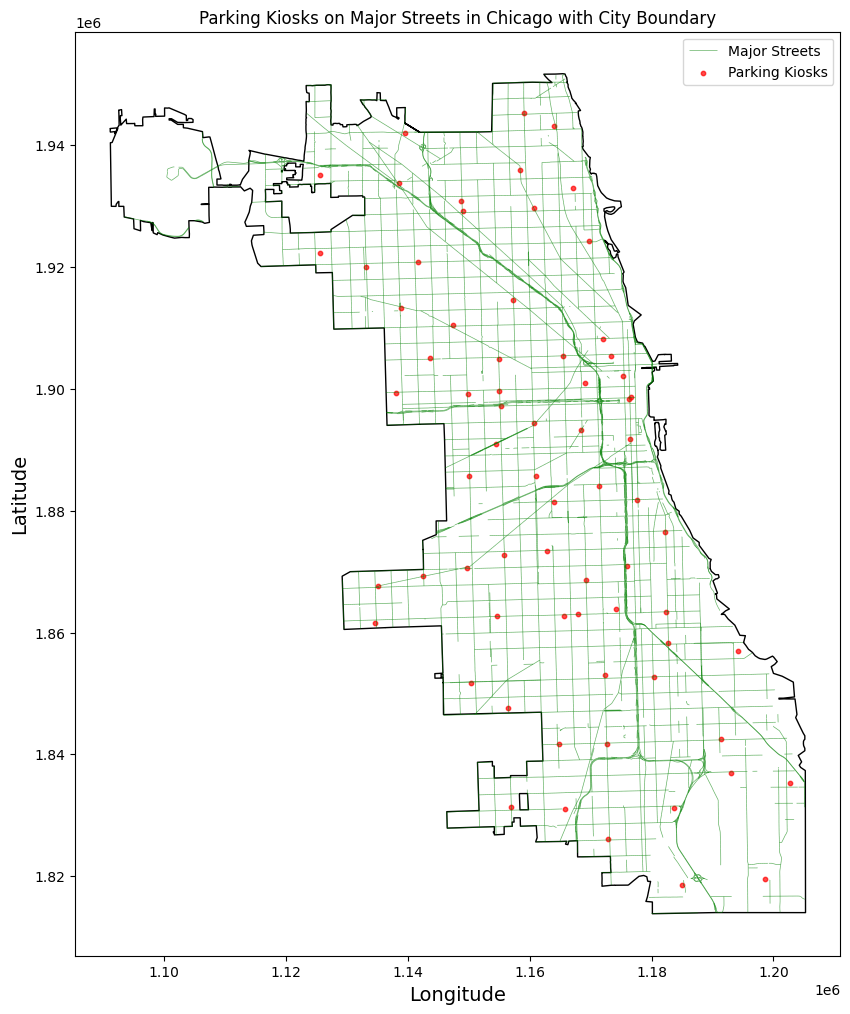

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

kiosks = pd.read_csv("/content/EZ_Pay_Kiosks_20241017.csv")

kiosks['geometry'] = kiosks['Location'].apply(wkt.loads)
gdf_kiosks = gpd.GeoDataFrame(kiosks, geometry='geometry', crs="EPSG:4326")

streets = gpd.read_file("/content/Major_Streets.shp")


city_boundary = gpd.read_file("/content/Chicago_City_Limits.shp")


gdf_kiosks = gdf_kiosks.to_crs(streets.crs)
city_boundary = city_boundary.to_crs(streets.crs)


fig, ax = plt.subplots(figsize=(12, 12))
city_boundary.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label='City Boundary')
streets.plot(ax=ax, linewidth=0.5, color='green', alpha=0.6, label='Major Streets')
gdf_kiosks.plot(ax=ax, color='red', markersize=10, alpha=0.7, label='Parking Kiosks')

plt.title('Parking Kiosks on Major Streets in Chicago with City Boundary')
plt.legend(loc='upper right')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()


<ipython-input-10-311667f66b9e>:5: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('/content/Building_Permits_20241017.csv')


['PERMIT - EASY PERMIT PROCESS' 'PERMIT - ELEVATOR EQUIPMENT'
 'PERMIT - SIGNS' 'PERMIT - WRECKING/DEMOLITION' 'PERMIT - SCAFFOLDING'
 'PERMIT - REINSTATE REVOKED PMT' 'PERMIT - PORCH CONSTRUCTION'
 'PERMIT - RENOVATION/ALTERATION' 'PERMIT - NEW CONSTRUCTION'
 'PERMIT – EXPRESS PERMIT PROGRAM' 'PERMIT - FOR EXTENSION OF PMT']


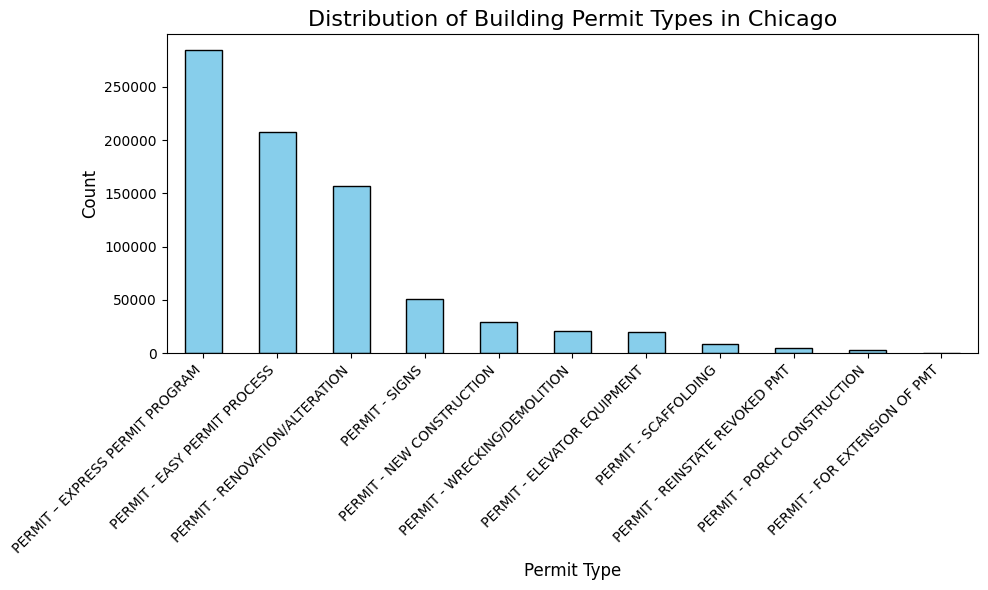

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


permits = pd.read_csv('/content/Building_Permits_20241017.csv')

permits.head()

print(permits['PERMIT_TYPE'].unique())

plt.figure(figsize=(10, 6))
permits['PERMIT_TYPE'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Building Permit Types in Chicago', fontsize=16)
plt.xlabel('Permit Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-3-6ef65ae47f45>:7: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('/content/Building_Permits_20241017.csv')
<ipython-input-3-6ef65ae47f45>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(permit_types))
<ipython-input-3-6ef65ae47f45>:57: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right', fontsize=15, title='Permit Types', bbox_to_anchor=

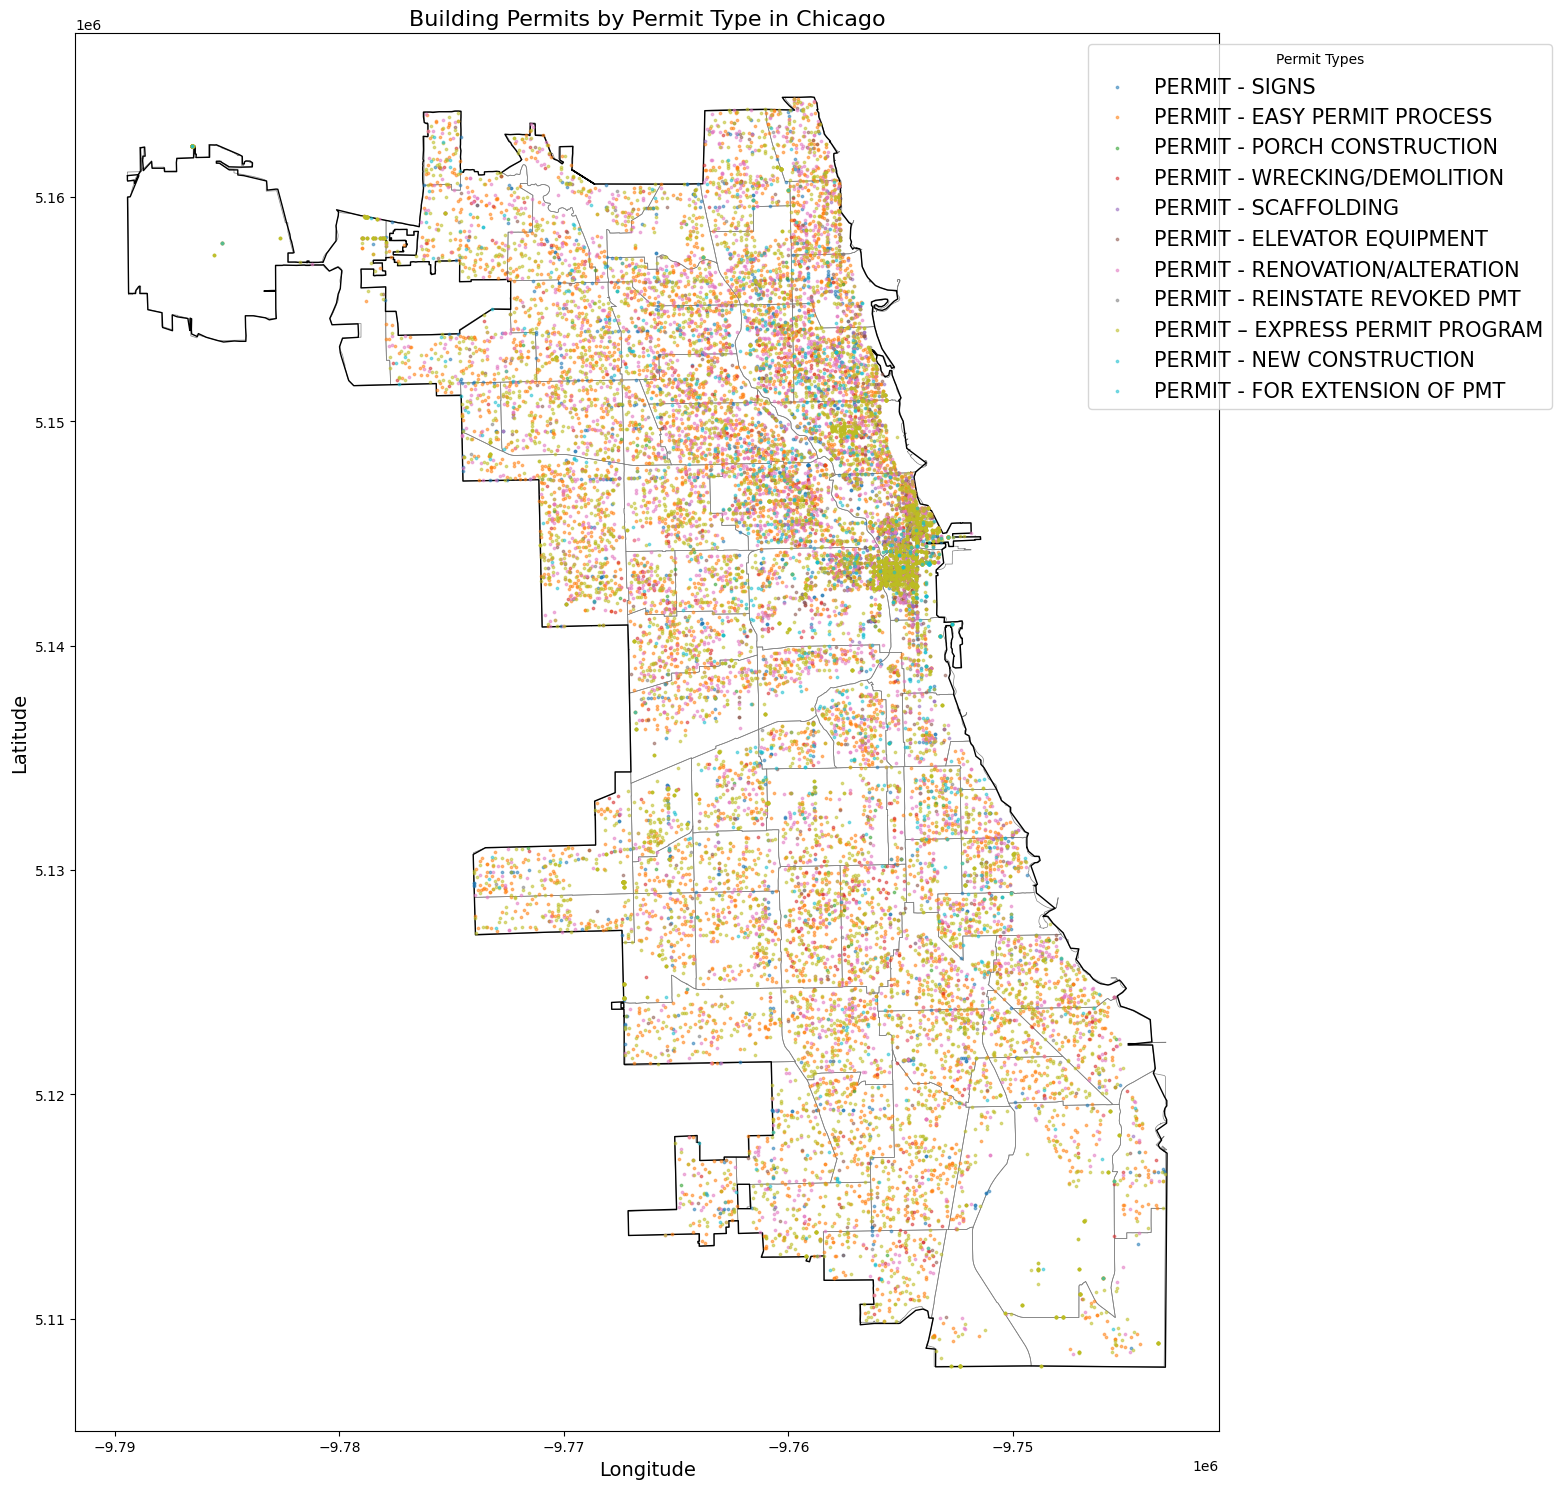

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

permits = pd.read_csv('/content/Building_Permits_20241017.csv')

permits = permits.dropna(subset=['latitude'.upper(), 'longitude'.upper()])

permits['geometry'] = gpd.points_from_xy(permits['longitude'.upper()], permits['latitude'.upper()])
gdf_permits = gpd.GeoDataFrame(permits, geometry='geometry', crs="EPSG:4326")

community_areas = gpd.read_file('/content/geo_export_c6ff1e3e-8ecf-437c-bd15-b03798303df5.shp')

city_boundary = gpd.read_file('/content/Chicago_City_Limits.shp')

gdf_permits = gdf_permits.to_crs(community_areas.crs)
community_areas = community_areas.to_crs(city_boundary.crs)
city_boundary = city_boundary.to_crs(community_areas.crs)

if not gdf_permits.crs == community_areas.crs:
    gdf_permits = gdf_permits.to_crs(community_areas.crs)

fig, ax = plt.subplots(figsize=(15, 15))

community_areas.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.5, label='Community Boundaries')

city_boundary.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label='City Boundary')

permit_types = gdf_permits['permit_type'.upper()].unique()
colors = plt.cm.get_cmap('tab10', len(permit_types))

for i, permit_type in enumerate(permit_types):
    subset = gdf_permits[gdf_permits['permit_type'.upper()] == permit_type]
    subset.sample(frac=0.03).plot(  # Optional: plot a random sample (e.g., 50%) for dense datasets
        ax=ax,
        markersize=3,
        label=permit_type,
        alpha=0.5,
        color=colors(i)
    )

plt.title('Building Permits by Permit Type in Chicago', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(loc='upper right', fontsize=15, title='Permit Types', bbox_to_anchor=(1.3, 1))


#ax.set_xlim([community_areas.total_bounds[0], community_areas.total_bounds[2]])
#ax.set_ylim([community_areas.total_bounds[1], community_areas.total_bounds[3]])


plt.tight_layout()
plt.show()

In [25]:
permits.head()

,ID,PERMIT#,PERMIT_STATUS,PERMIT_MILESTONE,PERMIT_TYPE,REVIEW_TYPE,APPLICATION_START_DATE,ISSUE_DATE,PROCESSING_TIME,STREET_NUMBER,...,PIN_LIST,COMMUNITY_AREA,CENSUS_TRACT,WARD,XCOORDINATE,YCOORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
927,1614372,100072937,NaN,NaN,PERMIT - SIGNS,SIGN PERMIT,10/17/2005,01/12/2006,87.0,120.0,...,NaN,NaN,NaN,NaN,1.175112e+06,1.899771e+06,41.880356,-87.632466,POINT (-87.632466106592 41.880356217665),POINT (-87.63247 41.88036)
929,1629022,100081468,NaN,NaN,PERMIT - SIGNS,SIGN PERMIT,11/30/2005,01/12/2007,408.0,954.0,...,NaN,NaN,NaN,NaN,1.169831e+06,1.899789e+06,41.880522,-87.651854,POINT (-87.651854462979 41.880522170644),POINT (-87.65185 41.88052)
931,1631453,100082922,NaN,NaN,PERMIT - SIGNS,SIGN PERMIT,12/07/2005,02/07/2006,62.0,70.0,...,NaN,NaN,NaN,NaN,1.177060e+06,1.900461e+06,41.882207,-87.625291,POINT (-87.625291317727 41.882206795974),POINT (-87.62529 41.88221)
934,1640968,100088865,NaN,NaN,PERMIT - SIGNS,SIGN PERMIT,01/10/2006,01/10/2006,0.0,140.0,...,NaN,NaN,NaN,NaN,1.176367e+06,1.899540e+06,41.879695,-87.627862,POINT (-87.627862219819 41.879694736024),POINT (-87.62786 41.87969)
936,1643693,100090610,NaN,NaN,PERMIT - EASY PERMIT PROCESS,EASY PERMIT,01/18/2006,01/18/2006,0.0,1909.0,...,NaN,NaN,NaN,NaN,1.147789e+06,1.912402e+06,41.915586,-87.732468,POINT (-87.732467818028 41.915585664555),POINT (-87.73247 41.91559)


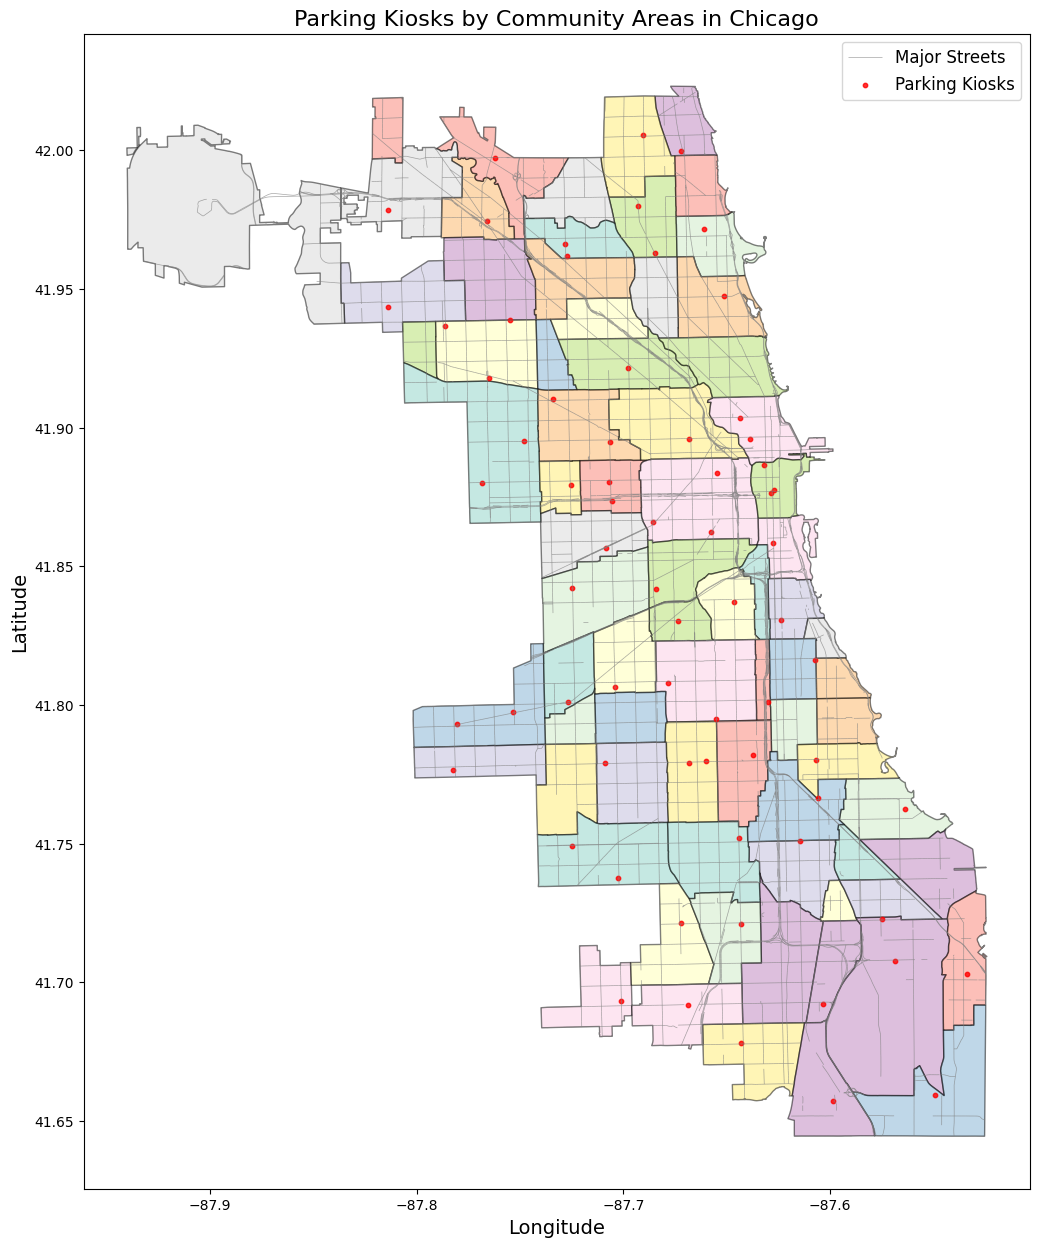

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

kiosks = pd.read_csv('/content/EZ_Pay_Kiosks_20241017.csv')

kiosks['geometry'] = kiosks['Location'].apply(wkt.loads)
gdf_kiosks = gpd.GeoDataFrame(kiosks, geometry='geometry', crs="EPSG:4326")

community_areas = gpd.read_file('/content/geo_export_c6ff1e3e-8ecf-437c-bd15-b03798303df5.shp')

streets = gpd.read_file('/content/Major_Streets.shp')

gdf_kiosks = gdf_kiosks.to_crs(community_areas.crs)
streets = streets.to_crs(community_areas.crs)

fig, ax = plt.subplots(figsize=(15, 15))

community_areas.plot(ax=ax, column='community', cmap='Set3', alpha=0.5, edgecolor='black', legend=True)
streets.plot(ax=ax, linewidth=0.5, color='gray', alpha=0.7, label='Major Streets')
gdf_kiosks.plot(ax=ax, color='red', markersize=10, alpha=0.8, label='Parking Kiosks')


plt.title('Parking Kiosks by Community Areas in Chicago', fontsize=16)
plt.legend(loc='upper right', fontsize=12)

plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()


In [9]:
len(violations['VIOLATION DESCRIPTION'].unique())

1396

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

violations = pd.read_csv('/content/Building_Violations.csv')

violations['geometry'] = gpd.points_from_xy(violations['Longitude'.upper()], violations['Latitude'.upper()])
gdf_violations = gpd.GeoDataFrame(violations, geometry='geometry', crs="EPSG:4326")

community_areas = gpd.read_file('/content/geo_export_c6ff1e3e-8ecf-437c-bd15-b03798303df5.shp')

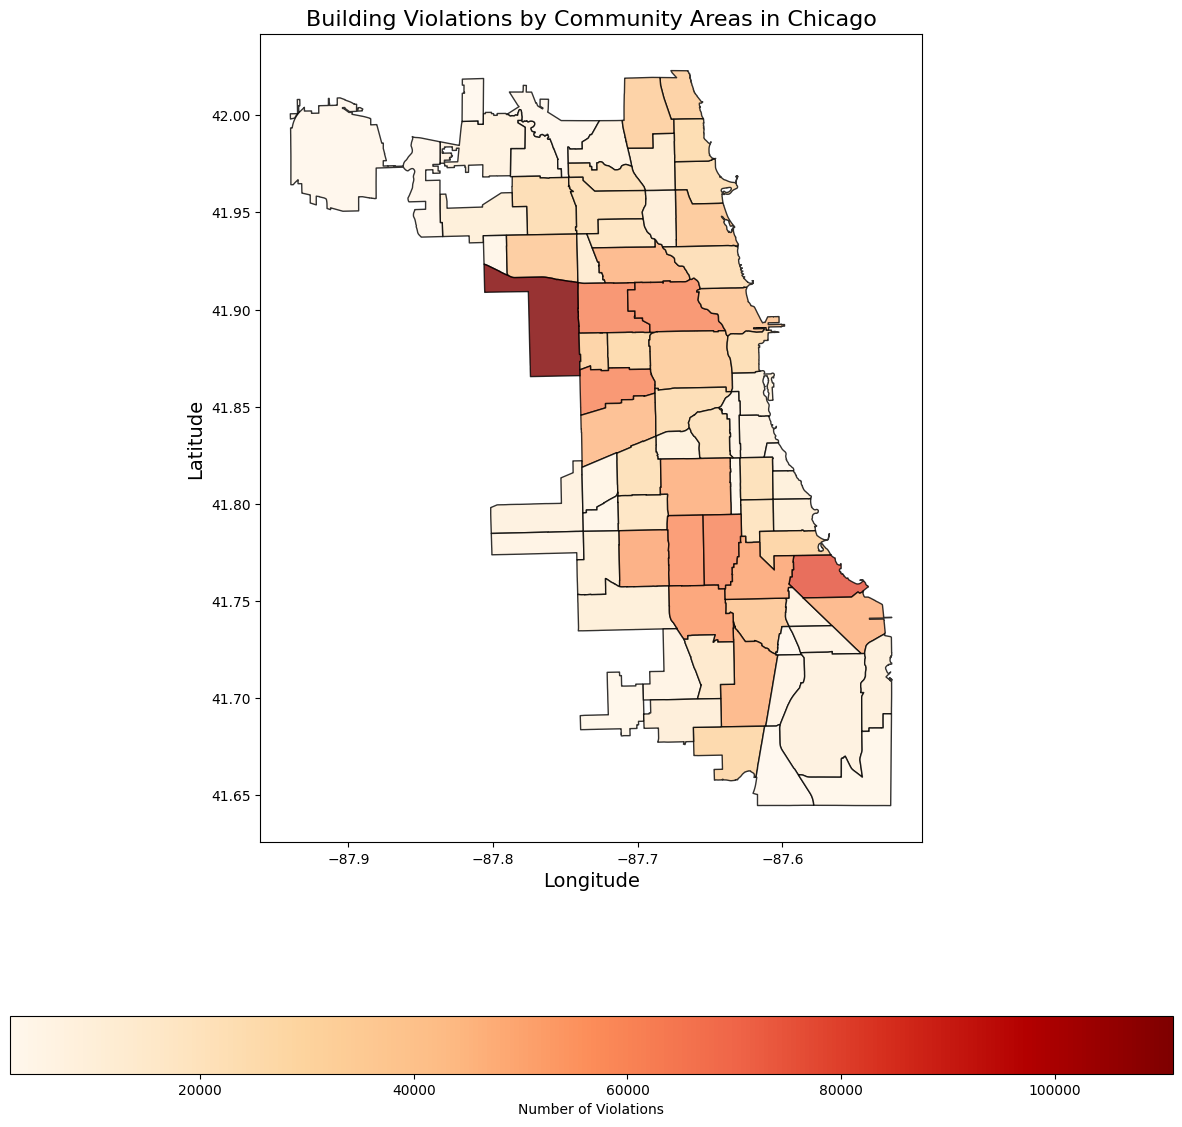

In [7]:


gdf_violations = gdf_violations.to_crs(community_areas.crs)

violations_by_area = gpd.sjoin(gdf_violations, community_areas, how='inner', predicate='within')

violation_counts = violations_by_area.groupby('community').size().reset_index(name='violation_count')

community_areas = community_areas.merge(violation_counts, on='community', how='left')

community_areas['violation_count'] = community_areas['violation_count'].fillna(0)

fig, ax = plt.subplots(figsize=(15, 15))

community_areas.plot(
    ax=ax,
    column='violation_count',
    cmap='OrRd',
    alpha=0.8,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Number of Violations", 'orientation': "horizontal"}
)

plt.title('Building Violations by Community Areas in Chicago', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)

plt.show()


<ipython-input-5-c88164a62740>:7: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('/content/Building_Permits_20241017.csv')


Correlation coefficient: 0.3974773306846095, p-value: 0.00034428620293424804


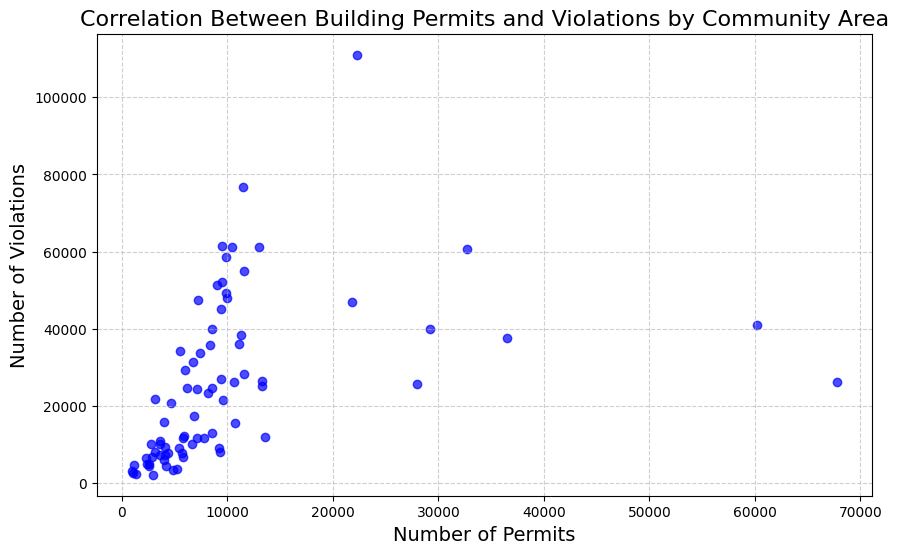

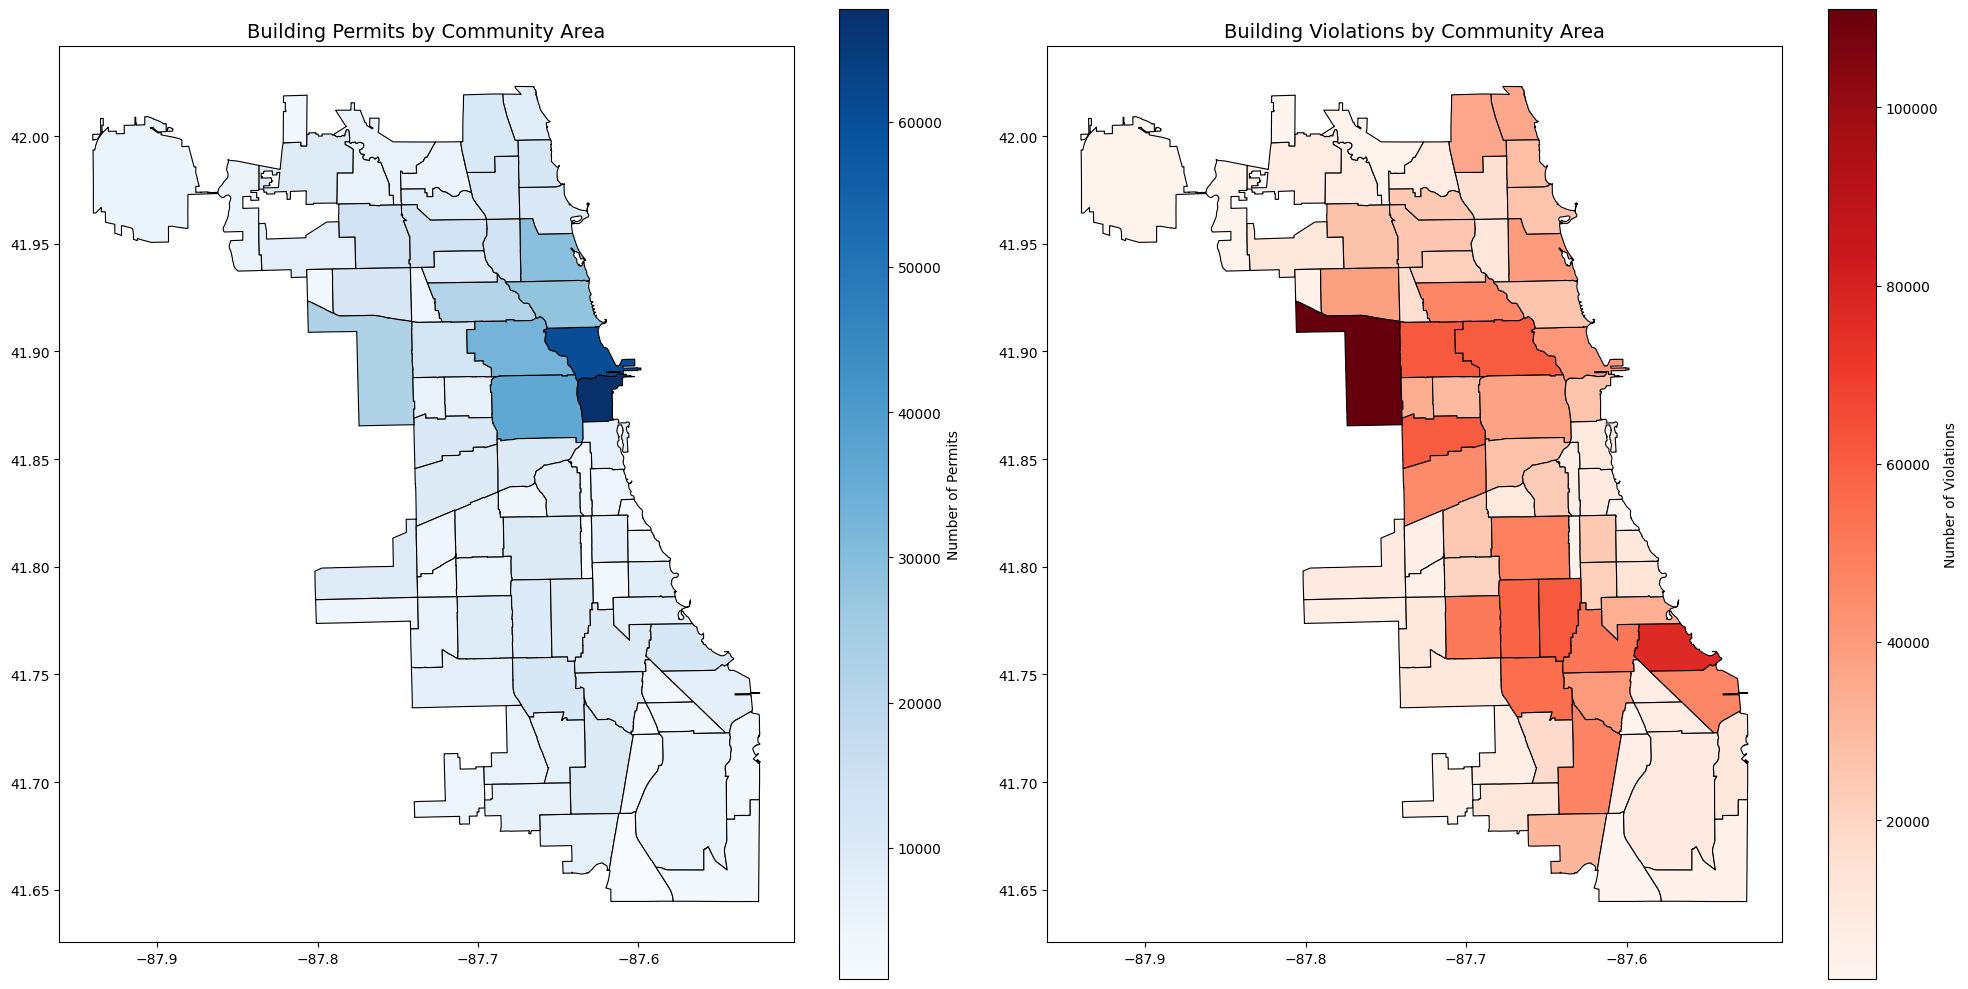

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

permits = pd.read_csv('/content/Building_Permits_20241017.csv')
violations = pd.read_csv('/content/Building_Violations_20241203.csv')

permits = permits.dropna(subset=['LATITUDE', 'LONGITUDE'])
violations = violations.dropna(subset=['LATITUDE', 'LONGITUDE'])

#permits = permits[permits['ISSUE_DATE'] >= '2006-01-01']
#violations = violations[violations['VIOLATION DATE'] >= '2006-01-01']

permits['geometry'] = gpd.points_from_xy(permits['LONGITUDE'], permits['LATITUDE'])
violations['geometry'] = gpd.points_from_xy(violations['LONGITUDE'], violations['LATITUDE'])
gdf_permits = gpd.GeoDataFrame(permits, geometry='geometry', crs="EPSG:4326")
gdf_violations = gpd.GeoDataFrame(violations, geometry='geometry', crs="EPSG:4326")

community_areas = gpd.read_file('/content/geo_export_c6ff1e3e-8ecf-437c-bd15-b03798303df5.shp')

gdf_permits = gdf_permits.to_crs(community_areas.crs)
gdf_violations = gdf_violations.to_crs(community_areas.crs)

permits_by_area = gpd.sjoin(gdf_permits, community_areas, how='inner', predicate='within').groupby('community').size().reset_index(name='permit_count')
violations_by_area = gpd.sjoin(gdf_violations, community_areas, how='inner', predicate='within').groupby('community').size().reset_index(name='violation_count')

correlation_data = permits_by_area.merge(violations_by_area, on='community', how='inner')

correlation_coefficient, p_value = pearsonr(correlation_data['permit_count'], correlation_data['violation_count'])
print(f"Correlation coefficient: {correlation_coefficient}, p-value: {p_value}")

plt.figure(figsize=(10, 6))
plt.scatter(correlation_data['permit_count'], correlation_data['violation_count'], alpha=0.7, color='blue')
plt.title('Correlation Between Building Permits and Violations by Community Area', fontsize=16)
plt.xlabel('Number of Permits', fontsize=14)
plt.ylabel('Number of Violations', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

community_areas = community_areas.merge(permits_by_area, on='community', how='left')
community_areas = community_areas.merge(violations_by_area, on='community', how='left')

community_areas.plot(column='permit_count', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='black', legend=True, legend_kwds={'label': "Number of Permits"})
ax[0].set_title('Building Permits by Community Area', fontsize=14)

community_areas.plot(column='violation_count', cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='black', legend=True, legend_kwds={'label': "Number of Violations"})
ax[1].set_title('Building Violations by Community Area', fontsize=14)

plt.tight_layout()
plt.show()


In [15]:
permits = pd.read_csv('/content/Building_Permits_20241017.csv')
permits.shape

<ipython-input-15-25764c9d9b07>:1: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('/content/Building_Permits_20241017.csv')


(787444, 115)

In [16]:
permits['ISSUE_DATE'] = pd.to_datetime(permits['ISSUE_DATE'])
permits = permits[permits['ISSUE_DATE'] >= '2006-01-01']
permits.shape

(787444, 115)

In [17]:
permits['ISSUE_DATE']

,ISSUE_DATE
0,2015-10-23
1,2015-11-05
2,2015-12-07
3,2015-12-17
4,2015-11-17
...,...
787439,2024-10-16
787440,2024-10-16
787441,2024-10-16
787442,2024-10-16


<ipython-input-1-9da7ef14ab4d>:5: DtypeWarning: Columns (0,1,12,34,39,44,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,106) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('/content/Building_Permits_20241017.csv')


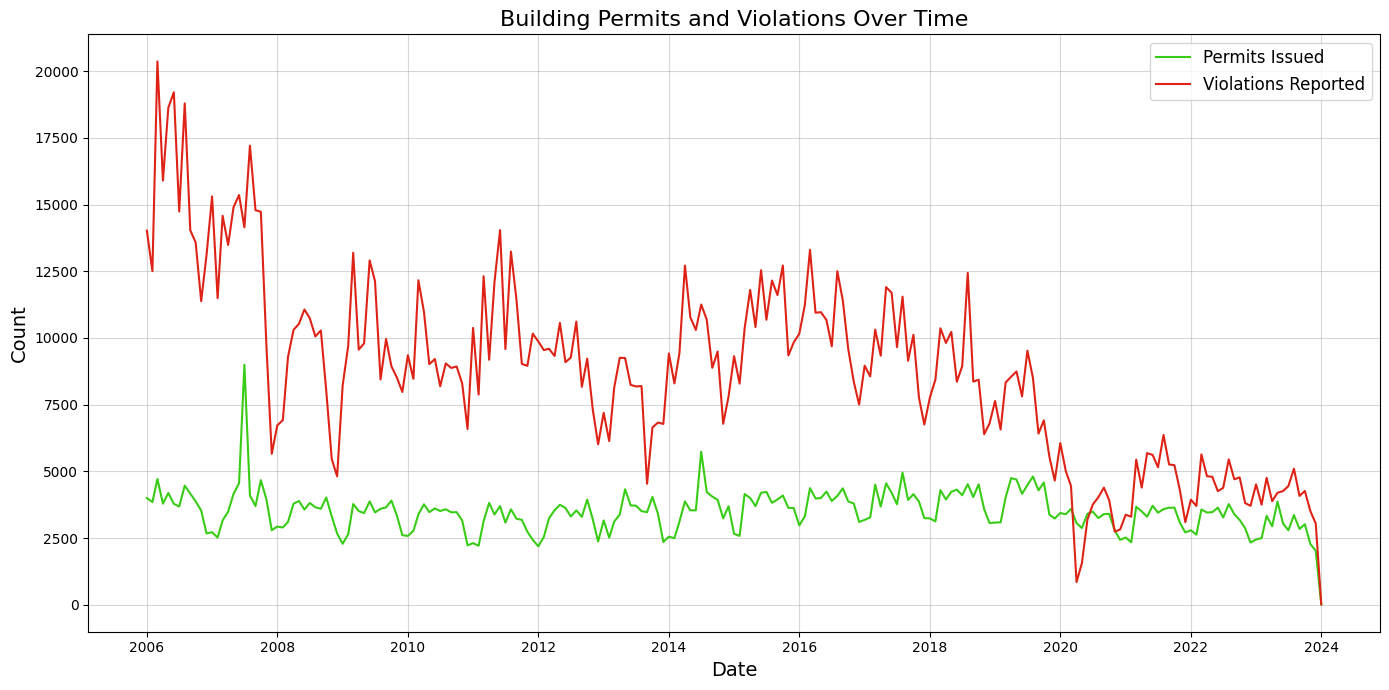

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

permits = pd.read_csv('/content/Building_Permits_20241017.csv')
violations = pd.read_csv('/content/Building_Violations_20241203.csv')

permits['ISSUE_DATE'] = pd.to_datetime(permits['ISSUE_DATE'], errors='coerce')
violations['VIOLATION DATE'] = pd.to_datetime(violations['VIOLATION DATE'], errors='coerce')



permits = permits[permits['ISSUE_DATE'] <= '2024-01-01']
violations = violations[violations['VIOLATION DATE'] <= '2024-01-01']

permits_time = permits.groupby(permits['ISSUE_DATE'].dt.to_period('M')).size().reset_index(name='permit_count')
violations_time = violations.groupby(violations['VIOLATION DATE'].dt.to_period('M')).size().reset_index(name='violation_count')

permits_time['ISSUE_DATE'] = permits_time['ISSUE_DATE'].dt.to_timestamp()
violations_time['VIOLATION DATE'] = violations_time['VIOLATION DATE'].dt.to_timestamp()

time_series = pd.merge(
    permits_time,
    violations_time,
    left_on='ISSUE_DATE',
    right_on='VIOLATION DATE',
    how='outer'
).fillna(0)

plt.figure(figsize=(14, 7))

plt.plot(time_series['ISSUE_DATE'], time_series['permit_count'], label='Permits Issued', color='#38cc16')
plt.plot(time_series['VIOLATION DATE'], time_series['violation_count'], label='Violations Reported', color='#de2316')

plt.title('Building Permits and Violations Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()
